# Final Project - <u>2016 UK Road Safety: Traffic Accidents and Vehicles</u>

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## <u> 1. Data Set Description <u>

<ul>
<li> <b> acci_df: </b> Each line represents a single traffic accident (identified by the Accident_Index column) and its various properties. </li>
<li> <b> veh_df: </b> Each line represents the involvement of a unique vehicle in a unique accident, featuring various properties regarding the vehicle itself and its passengers. </li>
<li> <b> df </b> is the merged dataset between <b> acci_df </b> and <b> veh_df </b>.</li>
</ul>

Important columns in <b> df </b>are:
<ol>
<li><b>Accident_Severity</b>: 0 means slight injury, 1 means severe injury or death.</li>
<li><b>Pedestrian_Crossing-Physical_Facilities</b>: if physical facilities is available for pedestrain crossing.</li>

<li><b>Month</b>: month when the accident happened.</li>
<li><b>Day_of_Week</b>: day of week when the accident happened.</li>
<li><b>Light_Conditions</b>: conditions include Daylight, Darkness - lights lit, Darkness - lights unlit, etc.</li>
<li><b>Road_Type</b>: types include single carriageway, double carriageway, roundabout, etc.</li>
<li><b>Speed_Limit</b>: numerical figures indicating the suggested speed.</li>
<li><b>Urban_or_Rural_Area</b>: if where the accident happened is urban or rural.</li>
<li><b>Road_Surface_Conditions</b>: conditions include dry, slipepry, flood, etc.</li>
<li><b>Age_Band_of_Driver</b>: age group of the driver.</li>
<li><b>Sex_of_Driver</b>: gender of the driver.</li>
<li><b>Age_of_Vehicle</b>: age group of the vehicle, mostyly with 10 years a gap.</li>
<li><b>Vehicle_Type</b>: includes Car, Motorcycle, bus, agricultural vehicle), Pedal Cycle, etc.</li>
<li><b>Vehicle_Manoeuvre</b>: type of action of the driver when the accident happened.</li>
</ol>

<b>acci_df</b>: This file is pretty large and it probably takes few time to read.

In [3]:
acci_df = pd.read_csv('Accident_Information.csv')

In [27]:
acci_df = acci_df[(acci_df.Year == 2016)]

In order to be efficient, we removed columns that are unnecessary for the analysis.

In [28]:
acci_df = acci_df[['Accident_Index', 'Accident_Severity', 'Pedestrian_Crossing-Physical_Facilities', 'Date', \
                   'Day_of_Week', 'Light_Conditions', 'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area', \
                   'Road_Surface_Conditions', 'Year']]

In [29]:
acci_df.head(1)

,Accident_Index,Accident_Severity,Pedestrian_Crossing-Physical_Facilities,Date,Day_of_Week,Light_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Road_Surface_Conditions,Year
1780653,2016010000005,Slight,0.0,2016-11-01,Tuesday,Darkness - lights unlit,Single carriageway,30.0,Urban,Dry,2016


<b>vehi_df</b>: This file is pretty large and it probably takes few time to read.

In [30]:
veh_df = pd.read_csv('Vehicle_Information.csv', encoding = "ISO-8859-1")

In [31]:
veh_df = veh_df = veh_df[(veh_df.Year == 2016)]

In order to be efficient, we removed columns that are unnecessary for the analysis.

In [32]:
veh_df = veh_df[['Accident_Index', 'Age_Band_of_Driver', 'Sex_of_Driver', 'Vehicle_Type', 'Vehicle_Manoeuvre', \
                 'Age_of_Vehicle']]

In [33]:
veh_df.head(1)

,Accident_Index,Age_Band_of_Driver,Sex_of_Driver,Vehicle_Type,Vehicle_Manoeuvre,Age_of_Vehicle
1924705,2016010000005,46 - 55,Male,Taxi/Private hire car,U-turn,NaN


<b>df</b>: Merge <b>acci_df</b> with <b>veh_df</b> on Accident_Index.

In [34]:
df = pd.merge(acci_df, veh_df, on='Accident_Index', how='inner')

In [35]:
df.head(1)

,Accident_Index,Accident_Severity,Pedestrian_Crossing-Physical_Facilities,Date,Day_of_Week,Light_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Road_Surface_Conditions,Year,Age_Band_of_Driver,Sex_of_Driver,Vehicle_Type,Vehicle_Manoeuvre,Age_of_Vehicle
0,2016010000005,Slight,0.0,2016-11-01,Tuesday,Darkness - lights unlit,Single carriageway,30.0,Urban,Dry,2016,46 - 55,Male,Taxi/Private hire car,U-turn,NaN


# <u> 2. Data Preparation </u>

Defined our dependent variable.

In [36]:
df.Accident_Severity = df.Accident_Severity.replace({'Slight': 0, 'Serious': 1, 'Fatal': 1})

Removed rows that are unnecessary for the analysis.

In [37]:
df = df[(df.Urban_or_Rural_Area != 'Unallocated') & (df.Road_Type != 'Unknown') & \
        (df.Road_Surface_Conditions != 'Data missing or out of range') & \
        (df.Sex_of_Driver != 'Data missing or out of range') & (df.Sex_of_Driver != 'Not known') & \
        (df.Light_Conditions != 'Data missing or out of range') & \
        (df.Light_Conditions != 'Darkness - lighting unknown') & \
        (df.Age_Band_of_Driver != 'Data missing or out of range') & \
        (df.Vehicle_Manoeuvre != 'Data missing or out of range') & \
        (df.Vehicle_Type != 'Data missing or out of range') & (df.Vehicle_Type != 'Other vehicle')]

Created 'Month' column in our dataset.

In [38]:
df['Month'] = df["Date"].astype(np.datetime64).dt.month

Duplicated information between 'Darkness - lights unlit' and 'Darkness - no lighting', so we aggregated them.

In [39]:
df.loc[df.Light_Conditions == 'Darkness - no lighting', 'Light_Conditions'] = 'Darkness - lights unlit'

Replaced string values of 'Age_Band_of_Driver' with integer values, which we can use as continuous variable in analysis.

In [40]:
df.Age_Band_of_Driver = df.Age_Band_of_Driver.apply(lambda x: 1 if x == '0 - 5' else 2 if x == '6 - 10' \
                                else 3 if x == '11 - 15' else 4 if x == '16 - 20' else 5 if x == '21 - 25' \
                                else 6 if x == '26 - 35' else 7 if x == '36 - 45' else 8 if x == '46 - 55' \
                                else 9 if x == '56 - 65' else 10 if x == '66 - 75' else 11)

Removed columns that are unnecessary for the analysis, also null values.

In [41]:
df.drop(columns = ['Accident_Index', 'Date', 'Year'], axis=1, inplace=True)

In [42]:
df.dropna(inplace = True)

In [43]:
df.head(1)

,Accident_Severity,Pedestrian_Crossing-Physical_Facilities,Day_of_Week,Light_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Road_Surface_Conditions,Age_Band_of_Driver,Sex_of_Driver,Vehicle_Type,Vehicle_Manoeuvre,Age_of_Vehicle,Month
1,0,0.0,Tuesday,Darkness - lights unlit,Single carriageway,30.0,Urban,Dry,5,Male,Motorcycle 50cc and under,Going ahead other,4.0,11


# <u> 3. Machine Learning: Decision Tree </u>

Before running decision tree, we dummied all the categorized variables.

In [44]:
df2 = pd.get_dummies(df, columns=['Day_of_Week','Light_Conditions','Road_Type','Urban_or_Rural_Area',\
     'Road_Surface_Conditions', 'Sex_of_Driver','Month','Vehicle_Type', 'Vehicle_Manoeuvre'])

In order to get a better understanding of our dataset, we calculated the percentage of Accident_Severity. From the result, we concluded that this dataset is unbalanced and probably won't get a nice tree with equal number of 0/1. 

In [45]:
df2.Accident_Severity.value_counts() / len(df2)

0    0.836561
1    0.163439
Name: Accident_Severity, dtype: float64

In [46]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

In [47]:
X = df2.drop('Accident_Severity',axis=1)

In [48]:
Y = df2.Accident_Severity

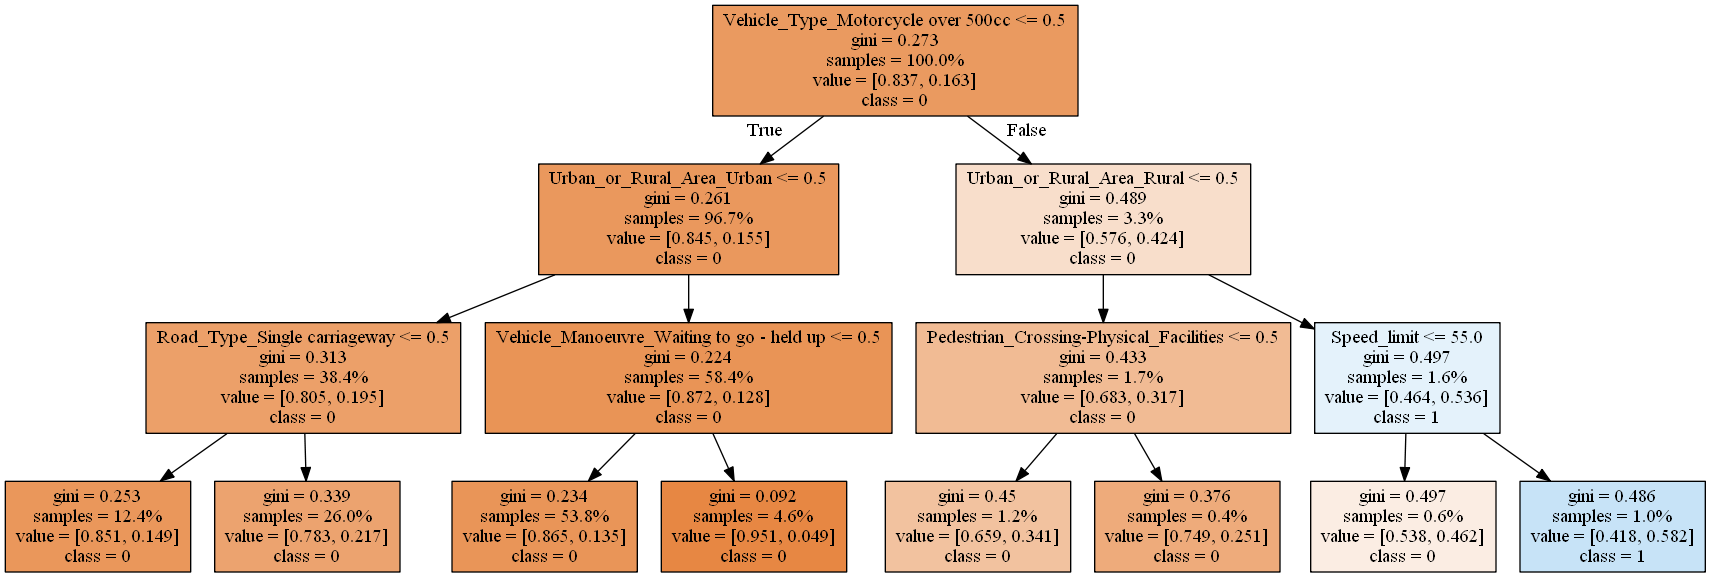

In [49]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X,Y)

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', proportion = True, 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

The tree above demonstrate the following:
<ol>
<li> No matter vehicles from rural area or urban one, they all tend to have slight injury except it's motorcycle over 500cc on a speed limit more than 55. </li>
<li> If vehicles hold up while waiting, they're less likely to have severe injury.</li>
<li> If vehicles travel on single carriageway, they're more likely to have severe injury.</li>
<li> If accidents happenes near pedestrian crossing physical facilities, drivers are less likely to have severe injury. </li>

# <u> 4. Machine Learning: Clustering </u>

In [50]:
from sklearn.cluster import KMeans

In [51]:
clu = KMeans(n_clusters=2, random_state=0)
df3 = df2.copy()
df3 = (df3 - df3.mean() ) / df3.std()
clu.fit(df3)
df4 = df2.copy()
df4['Cluster'] = clu.labels_
df4.groupby('Cluster').mean().T

Cluster,0,1
Accident_Severity,0.209632,0.132291
Pedestrian_Crossing-Physical_Facilities,0.169974,1.164745
Speed_limit,52.178191,31.480926
Age_Band_of_Driver,7.015623,6.907478
Age_of_Vehicle,8.168352,8.038441
Day_of_Week_Friday,0.168907,0.166042
Day_of_Week_Monday,0.141327,0.140577
Day_of_Week_Saturday,0.125148,0.133557
Day_of_Week_Sunday,0.117367,0.104759
Day_of_Week_Thursday,0.152774,0.152671


Through clustering, we detected two different groups: Cluster 0 has higher probability to get severe injury, and its characteristics are as following:
<ol>
<li> Pedestrian Crossing Physical Facilities are less on site. </li>
<li> Speed is higher.</li>
<li> Related to 'Light_Conditions_Darkness - lights unlit', which is one type of dangerous driving.</li>
<li> Probably happens at rural area.</li>

# <u> 5. Validity of the Finding </u>

Below are table/charts to validate the effect of 'Motorcycle over 500cc', 'Urban_or_Rural_Area', 'Vehicle_Manoeuvre_Waiting to go - held up', 'Road_Type_Single carriageway', 'Pedestrian_Crossing-Physical_Facilities' and 'Speed_limit' on Accident_Severity.

In [71]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


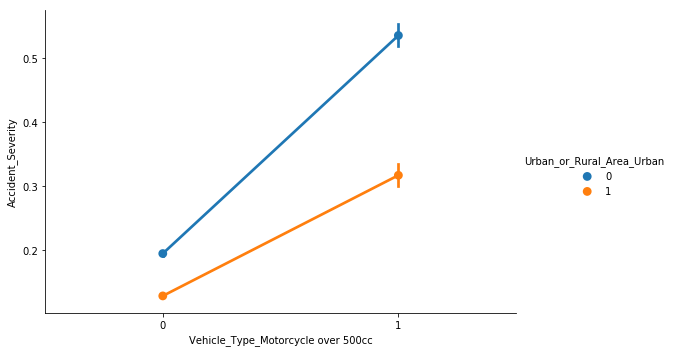

In [86]:
sns.catplot(data=df2,y='Accident_Severity',x='Vehicle_Type_Motorcycle over 500cc',kind ='point',aspect=1.5, \
            hue='Urban_or_Rural_Area_Urban')

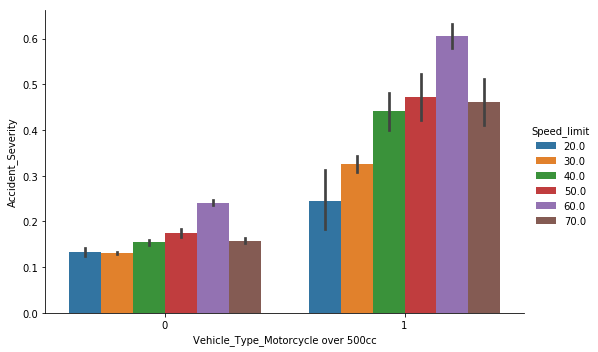

In [87]:
sns.catplot(data=df2,y='Accident_Severity',x='Vehicle_Type_Motorcycle over 500cc',kind ='bar', aspect=1.5, \
            hue='Speed_limit')

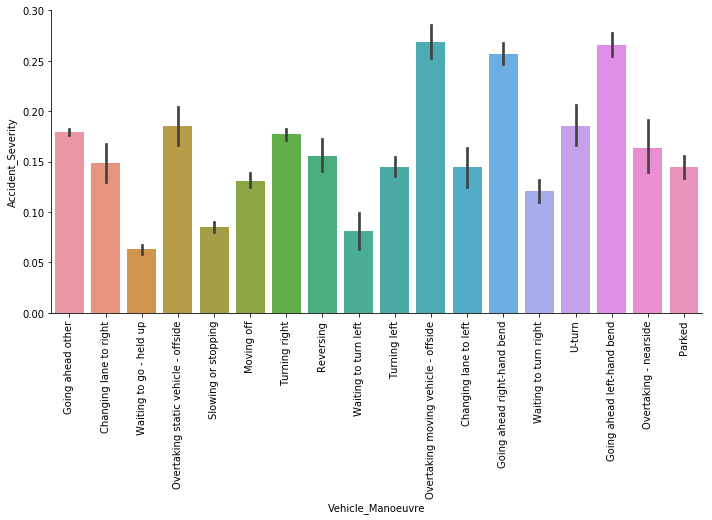

In [98]:
sns.catplot(data=df,y='Accident_Severity',x='Vehicle_Manoeuvre',kind ='bar',aspect=2).set_xticklabels(rotation=90)

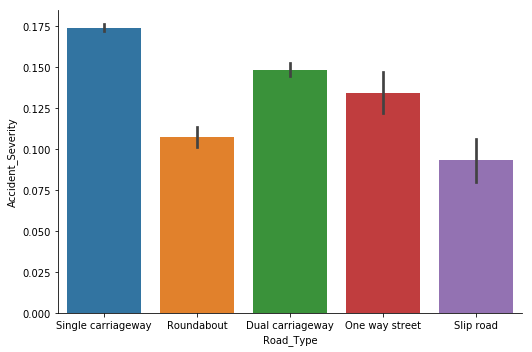

In [85]:
sns.catplot(data=df,y='Accident_Severity',x='Road_Type',kind ='bar',aspect=1.5)

Through the graphs, we validated the following:
<ol>
<li> Motorcycle over 500cc is the most likely vehicle to get severe injury.</li>
<li> Spped at 60 mph is most likely to get severe injury.</li>
<li> Waiting to go - held up has the lowest probability to get severe injury.</li>
    <li> Single carriageway is most likely to get severe injury.</li>

# <u> 6.  Managerial Insights</u>

After analisis on 2016 UK Road Safety: Traffic Accidents and Vehicles, we came up with the following: 
<ol> 
<li> The Department for Transport in UK probably should set the speed limit of motorcycle over 500CC under 55 mph in rural area.</li>
<li>  In order to keep low probability to get severe injury, it should also recommend drivers to hold up when waiting.</li>
<li> For road infrastructure, it should build less single carriageway and more pedestrian crossing physical facilities.
</ol>

This is a surprising finding as one may think conceptually accidents would be affected by gender, age of driver, etc. However, from our findings, these are not the most critical factors leading to severe accidents. 

Therefore, from our perspective, instead of focusing on car age, age of driver, etc. drivers should focus on how they behave on the road (especially in rural area) to avoid getting into a severe accident.